In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# History 
Breast cancer has become a matter of  concern which needs proper mitigation steps as it is very painful and terrifying. If we take example of India alone in 2018 census says total 1,62,468 new caese were registered and 87,090 were reported dead. 
Cancer is like a trauma and it is very difficult to cure whenit is detected at later stage. Moreover, chances of survival is extemely impossible when it is detected at stage 4. 
In India around 50% of womens are suffering from satge 3-4 breast cancer. So, it is the need of hour that there should be some robust and accurate technique to address this matter of concern at very early stage so, that with proper medical treatment it can be cured and can able to save life. 
machine learning is contributing alot in this regard by preparing model and detecting cancer at early stage. 
# problem statement
to detect cancer cell in order to save life - to solve this problem we have used various classification algorithm like (KNN,Random Forest, Support Vector Machine)
# KNN algorithm 
it is simplest supervised machine learning algorithm which is used for classification purpose. KNN works on the principle of similarity for example it store training data and when we feed new data to the model it check for the similarity and accordingly it classify the data set. It is non parametric and lazy learner because it does not learn from the training data rather it store the data. 
# How does KNN work 
1. first step is to decide the number of nearest neighbour
2. then it will calculate euclidean between new data and existing data and as per number of nearest neighbour it select the x numbers of data from existing which are close to new data 
3. suppose from category A (existing data ) total 3 data set are close to new data point and from category B(existing data ) 5 data points are close enough to new data points then the new data is similary to cateogry B based on maxing votting concept 
# Bagging 
Bagging is an ensemble technique which is use to reduce the variance of prediction by combining the results of various models together which are build on sub sample of orginial data set using Bootstrap sampling technique wherein sampling is done with replacement and each and evry data points has equal opportunity to get selected. 
# Random Forest - 
Random Forest is an ensemble machine learning algorithm which is based on bagging technique and it is robust technique which can perfome both regression and classification task. It is robust in nature because it can do dimension reduction, can treat missing data, treat outlier futher it can performe all necessary steps required during model building. 
# How does it work 
Since it is based on ensemble technique it divide the data into small subsets and build weak tree models using those small subset further using max votting or averaging technique based on the type of problem if it is regression it will use averaging  and if it is classification it will use max votting technique and combine numbers of weak learners together to build one robust strong model. 
# support vector machine 
it is also a supervise machine learning algorithm which can perform both regression as well as classicicaion algorithm,but it is not based on ensemle technique rather it is based on statistical approach so it is bit different from logistic regression which is based on probability approach. 
# types of SVM 
1. linear --> in this using one straight line as hyperplane we can able to classify the observation into different groups 
2. non linear --> where we can't be able to classify observations using straight line instead we will required a kernel or functions which will lift the dimension of the observation and then in higher dimension we can easliy make decision boundary and seperate our target observationin respective groups 
# Support vector 
it is defined as the data point which is very close to the Hyperplane(decision boundary)
# margin 
the maximum width between negative and positive hyperplane is called margin.The more is the margin the better will be the model 
# Hyperplane/decision boundary 
it is the best line which is drawn in between the data set in order to classify them into respective class.
# hard margin 
when we are able to sepearte the data using straight line then there whatever margin we get is hard margin 
# soft margin 
when we are unable to seperate the data using straight line then in that case we use some functions or kernels to do the speration task and there whatever margin we get is soft margin 
# kernel 
it is a function (non linear) which which is used to convert lower dimension data set into higher dimension which allows us to make a decision boundary in between the data set and seperate the data set and it is called kernel
# types of kernel 
1. polynomial
2. sigmoid 
3. RBF(radial base function) which is most widely used because of its simple mathematics. It basically create non-linear combinations of features to lift there dimension to higher in order to make decision boundary easily to seperate the data set. 
4. annova 
5. bassel
# How does SVM work 
it works on statistical approach wherein it first check whether data can be seperated by staright line or not once this is done it draw a hyperplane between the observation then it try to find the support vector and using that support vector it further draw 2 more hyperplane passing through the support vector and are parallel to optimum hyperplane. Then it claculate the width of margin an try to get maximum margin width. Then it make prediction


In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for building we need few of these lib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [3]:
Bcancer_df= pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [4]:
Bcancer_df.shape
# using shape function we can get an idea of how many rows and column does the data set hold here there are 569 rows and 33 columns 

(569, 33)

In [5]:
Bcancer_df.info()
# info() function gives information like nos of col , nos of rows, dtype of each col, info of null value, column name etc  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
Bcancer_df.head(30)
# head() function used to display the data set and when we pass some specific nos like in our case i have pass 30 it is 
# showing me top 30 observation in our data set and oppsite of head is tail() is gives 5 bottom values by default unless we pass some number 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [7]:
Bcancer_df.columns # it gives information about the nme of columns in the data set 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
Bcancer_df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
Bcancer_df.columns
# in this step we are dropping the least important features from our data set to reduce the dimension of the data set in order to restrict 
# the model from overfitting. 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
Bcancer_df.diagnosis.replace({"M":1,"B":0},inplace=True)
Bcancer_df.diagnosis.unique()
#  diagnosis col contains M = malignant (cancerous cell) B = benign (non cancerous cell) and we are laeling it with M = 1, B = 0 as it will be 
# easy for our model to work on 0 and 1 value rather than on string value 

array([1, 0])

Text(0.5, 1.0, 'CORRELATION MAP ')

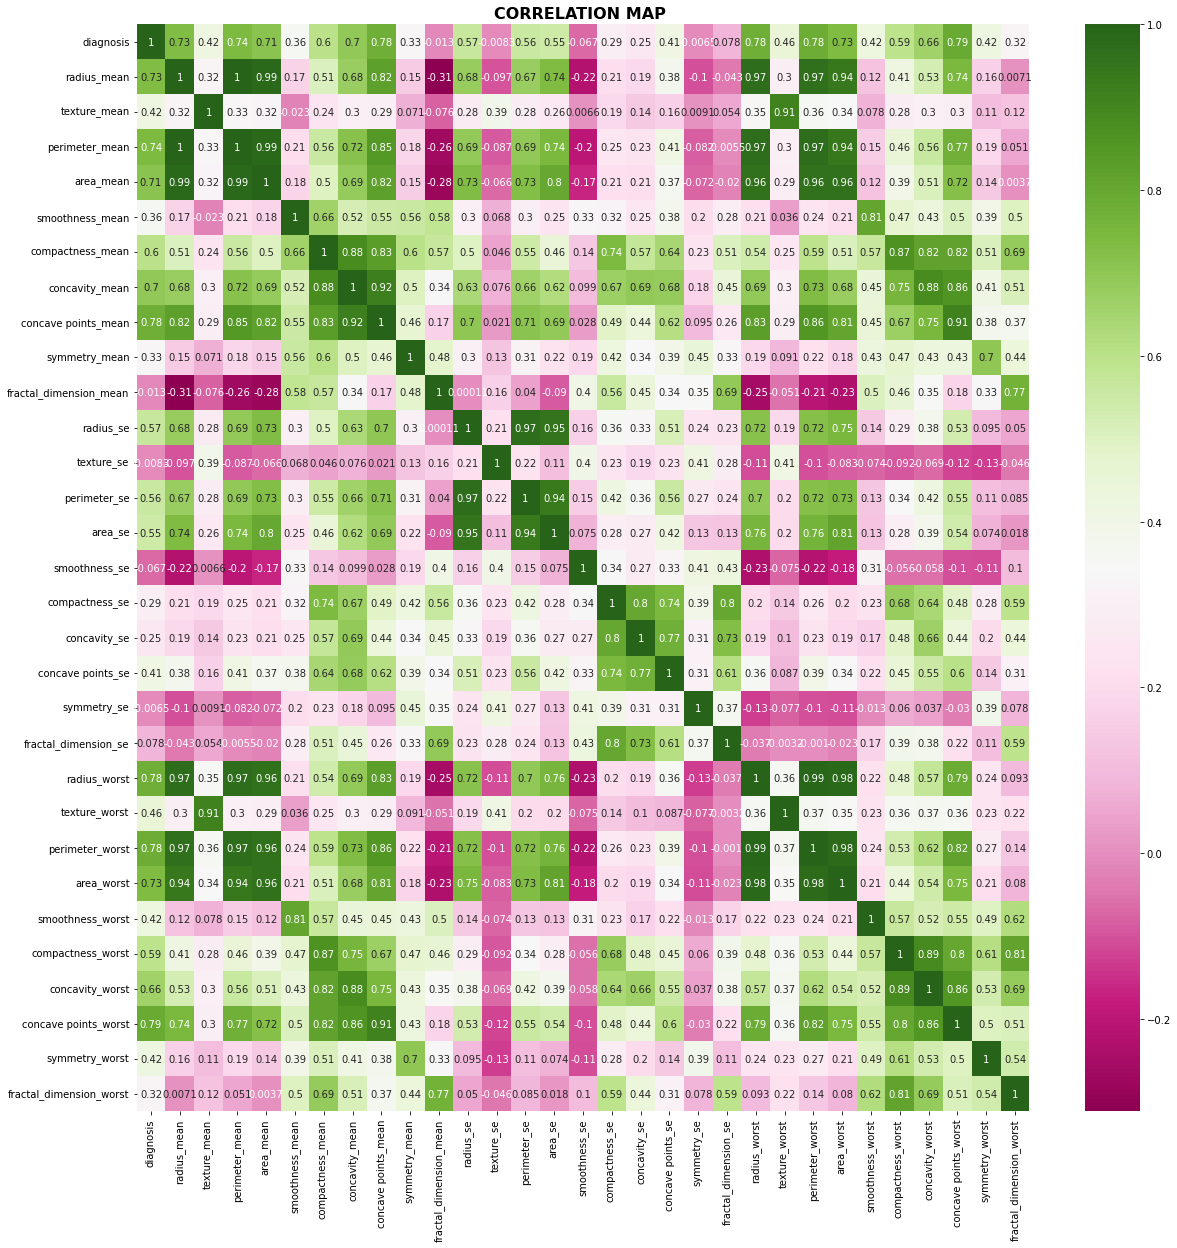

In [10]:
# here we are interested in finding the correlation between our target variable ie diagnosis and independent features 
corr = Bcancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Bcancer_df.corr(), cmap='PiYG', annot = True)
plt.title("CORRELATION MAP ", fontweight = "bold", fontsize=16)

from the above heatmap we are trying to find the correlation between our target variable and independent variable and we are taking only those features which are having correlation greater than .59 or 59%

1. correlation between diagnosis and radius_mean is .73
2. correlation between diagnosis and perimeter_mean is .74
3. correlation between diagnosis and area_mean is .71
4. correlation between diagnosis and compactness_mean is .6
5. correlation between diagnosis and concavity_mean is .7
6. correlation between diagnosis and concave point_mean is .78
7. correlation between diagnosis and radius_worst is .78
8. correlation between diagnosis and perimeter_worst is .78
9. correlation between diagnosis and area_worst is .73
10. correlation between diagnosis and concave point_worst is .79
here further more the problem of multicollinearity does exist as we can see from the correlation heat map or we can use VIF(variance influence factor and it is equal to (1-1/R^2) and if VIF>10 then there exist multicollinearity and in our analysis we didnt touch that part but for building logistic or multilinear regression model we have to address this problem and it can be done by simply identifying which all the parameters are highly correlated or not of that importance that can be droped out our further wwe can use the concept of PCA principal component analysis in order to find best parameters that is required for the analysis in this way we can incounter the problem of multicollinearity between the variables 

In [11]:
corr[abs(corr['diagnosis']) > 0.59].index  
# here as we can see that there are numbers of features which are correlated with our target variable 

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation between feature variable and target variable '}>

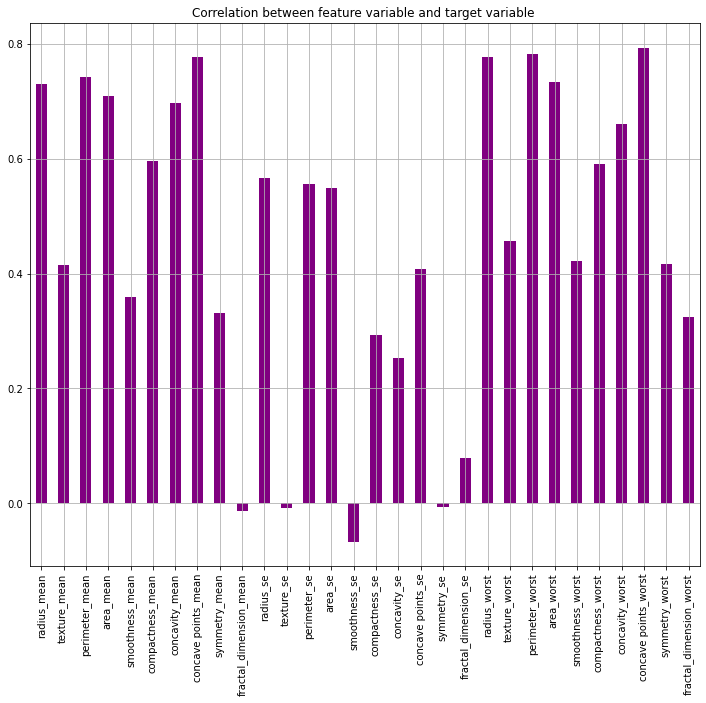

In [12]:
Bcancer_df.drop('diagnosis', axis=1).corrwith(Bcancer_df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation between feature variable and target variable ",color="purple")

above plot suggest or give informations which feature variable is more correlated to our target variable 

# splitting the data set 

In [13]:
x = Bcancer_df.drop("diagnosis",axis = 1)
y = Bcancer_df.diagnosis

In [14]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# train test split

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
Bcancer_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42,shuffle=True, stratify=y)

In [19]:
print('x_train shape : ', x_train.shape )
print('y_train shape : ', y_train.shape )
print('x_test shape : ', x_test.shape )
print('y_test shape : ', y_test.shape )

x_train shape :  (381, 30)
y_train shape :  (381,)
x_test shape :  (188, 30)
y_test shape :  (188,)


# KNN (K nearest neigbhors)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []
K=[]
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    K.append(i)

In [21]:
results= { 'train_scores':train_scores,
         'test_scores':test_scores,
         'K':K}
results_df =  pd.DataFrame(results,
        columns=['train_scores','test_scores', 'K'])
results_df

,train_scores,test_scores,K
0,1.000000,0.909574,1
1,0.958005,0.920213,2
2,0.960630,0.930851,3
3,0.947507,0.925532,4
4,0.939633,0.930851,5
5,0.937008,0.914894,6
6,0.942257,0.930851,7
7,0.934383,0.925532,8
8,0.934383,0.941489,9
9,0.926509,0.925532,10


in our k nearest neighbour model we have passed k value from 1 to 14 and we trained our model using different value of k as we can see above and futher we calculated the train and test score and accordingly we decided the value of k for our further analysis 

In [22]:
KNNModel = KNeighborsClassifier(13)
KNNModel.fit(x_train,y_train)

train_score = KNNModel.score(x_train,y_train)
test_score = KNNModel.score(x_test,y_test)
print( 'train_score ', train_score)
print( 'test_score ',test_score )

train_score  0.9212598425196851
test_score  0.9468085106382979


In [23]:
y_pred = knn.predict(x_test)


knn_cm= confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,117,1,118
1,12,58,70
All,129,59,188


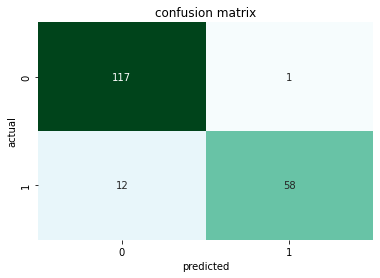

In [24]:
sns.heatmap(knn_cm,annot = True , fmt = 'g', vmin = 0 , cmap = 'BuGn',cbar = False )
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

from confusion matrix we can conclude the model is able to predict benign as benign 117 times and wrongly predicting benign as malignant 12 times further model is correctly predicting malignant as malignant 58 time and wronglyby 1 times 

In [25]:
from sklearn import metrics 
print('accuracy : ',metrics.accuracy_score(y_test,y_pred) )

accuracy :  0.9308510638297872


# Random forest with hygperparameter tunning 

In [26]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True, stratify=y)

In [27]:
print('x2_train shape : ', x2_train.shape )
print('y2_train shape : ', y2_train.shape )
print('x2_test shape : ', x2_test.shape )
print('y2_test shape : ', y2_test.shape )

x2_train shape :  (398, 30)
y2_train shape :  (398,)
x2_test shape :  (171, 30)
y2_test shape :  (171,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state =42)
from pprint import pprint # used to look at the parameter already in use 
print('parameters currently in use: \n')
pprint(rf.get_params())

parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Hyperparameter tunning 
it is a technique using which we tends to find the best value for our hyperparameters in order to boost the performance of the model 
# hyperparameter 
hyparameters are the parameter which is not the part of actual programing but it is used in addition from outside we are trying to controll the algorithim that is called hyperparameter. 
# hyperparameter tunning can be achieve by 2 ways 
1. RandomSearchCV --> it is a techniques wherein we give range for various hyper parameters and later we make a grid and store all the values in the grid and later we define a function which iterate over and overdifferent values of the parameter and give best out of it and that can be used to build model which can boost the performance 
2. GridSearchCv --> it is the technique in which we try to build a grid wherein we assign certain values to each parameter and then using a function we iterrate over and over and evaluate which values is best for building the model.


In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 2000, num =10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap=[True,False]

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap
              }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [30]:

rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 100 , cv = 3 , verbose = 2, random_state  = 42, n_jobs = -1)

rf_random.fit(x2_train,y2_train)
rf_random.best_params_
               

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min


[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.6s
[CV] n_estimators=1155, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1155, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   3.3s
[CV] n_estimators=1366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   3.8s
[CV] n_estimators=100,

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min



[CV] n_estimators=1577, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1577, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   4.5s
[CV] n_estimators=1577, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1577, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   4.3s
[CV] n_estimators=944, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=944, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   3.0s
[CV] n_estimators=944, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=944, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   2.6s
[CV] n_estimators=2000,

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


{'n_estimators': 311,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

using hyperparameter tunning i got best hyperparameter value using which i can get best model with accuracy 
1. n_estimators': 100,
2. min_samples_split': 2,
3. min_samples_leaf': 2,
4. max_features': 'sqrt',
5. max_depth': 80,
6. bootstrap': False


In [31]:
def evaluate(model,x2_test,y2_test):
    y_pred = model.predict(x2_test)
    error = abs(y_pred-y2_test)
    mape = 100*np.mean(error/y2_test)
    accuracy = 100-mape
    print ('model performance')
    print('average error : {:.4f} '.format(np.mean(error)))
    print('accuracy = {:.2f}%'.format(accuracy))
    return accuracy
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,x2_test,y2_test)


model performance
average error : 0.0409 
accuracy = 89.06%


# support vector machine 

In [32]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.3,random_state=101,shuffle=True, stratify=y)

In [33]:
print('x1_train shape : ', x1_train.shape )
print('y1_train shape : ', y1_train.shape )
print('x1_test shape : ', x1_test.shape )
print('y1_test shape : ', y1_test.shape )

x1_train shape :  (398, 30)
y1_train shape :  (398,)
x1_test shape :  (171, 30)
y1_test shape :  (171,)


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [35]:
# without hyperparameter tunning
model = SVC()
model.fit(x1_train, y1_train)
 
# print prediction results
predictions = model.predict(x1_test)
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       107
           1       1.00      0.83      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [36]:
print('accuracy : ',metrics.accuracy_score(y1_test,predictions))

accuracy :  0.935672514619883


In [37]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x1_train, y1_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [39]:
grid_predictions = grid.predict(x1_test)
 
# print classification report
print(classification_report(y1_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       107
           1       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [40]:
print('accuracy : ',metrics.accuracy_score(y1_test,grid_predictions))

accuracy :  0.9298245614035088
